<a href="https://colab.research.google.com/github/mahireddy1318/udemy_pytorch/blob/main/04_PyTorch_Custom_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
torch.__version__

'2.1.0+cu118'

In [ ]:

import torchvision.datasets
import torchvision.transforms

In [ ]:
# Setup data directory
import pathlib
from pathlib import Path
data_dir = pathlib.Path("../data")

In [ ]:
from torchvision.transforms.transforms import ToTensor
from torchvision import datasets
train_data = datasets.Food101(root= data_dir, split='train',
                              download = True, #transform=ToTensor
                              )
test_data = datasets.Food101(root=data_dir, split='test',
                             download=True, #transform=ToTensor
                             )

100%|██████████| 4996278331/4996278331 [03:37<00:00, 22971169.11it/s]


Extracting ../data/food-101.tar.gz to ../data


In [ ]:
train_data

Dataset Food101
    Number of datapoints: 75750
    Root location: ../data
    split=train

In [ ]:
test_data

Dataset Food101
    Number of datapoints: 25250
    Root location: ../data
    split=test

In [ ]:
data_dir

PosixPath('../data')

In [ ]:
class_names = train_data.classes
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
pathlib_cwd = Path.cwd()
pathlib_cwd

PosixPath('/content')

In [ ]:
Path('/..data').iterdir()

<generator object Path.iterdir at 0x7f0e1778c9e0>

<class 'PIL.Image.Image'>
oysters


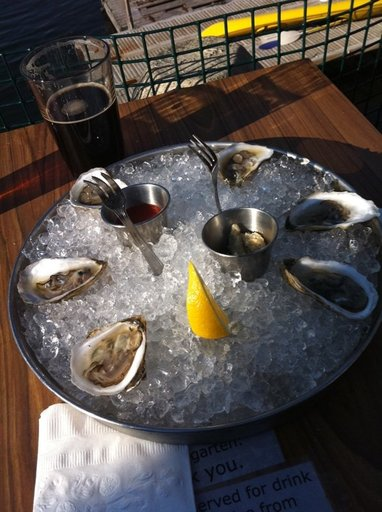

In [ ]:

print(type(train_data[0][0]))
print(class_names[train_data[75749][1]])
train_data[75749][0]
#train_data[75749][1]

In [ ]:
# Get random 10% of training images
import random

# Setup data paths
data_path = data_dir / "food-101" / "images"
target_classes = ["pizza", "steak", "sushi", 'apple_pie','beef_tartare']


In [ ]:
data_path

PosixPath('../data/food-101/images')

In [ ]:

amount_to_get = 0.2

# Create function to separate a random amount of data
def get_subset(image_path=data_path,
               data_splits=["train", "test"],
               target_classes=["pizza", "steak", "sushi", 'apple_pie','beef_tartare'],
               amount=0.1,
               seed=42):
    random.seed(42)
    label_splits = {}

    # Get labels
    for data_split in data_splits:
        print(data_split,'---')
        print(f"[INFO] Creating image split for: {data_split}...")
        label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"
        print(label_path,'---')
        with open(label_path, "r") as f:
            labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes]
            print('***',labels)

        # Get random subset of target classes image ID's
        number_to_sample = round(amount * len(labels))
        print('number_to_sample', number_to_sample)
        print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}...")
        sampled_images = random.sample(labels, k=number_to_sample)
        print('sampled_images', sampled_images)
        # Apply full paths
        image_paths = [pathlib.Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
        print('image_paths', image_paths)
        label_splits[data_split] = image_paths
    return label_splits

label_splits = get_subset(amount=amount_to_get)
label_splits["train"][:3]

train ---
[INFO] Creating image split for: train...
../data/food-101/meta/train.txt ---
*** ['apple_pie/1005649', 'apple_pie/1014775', 'apple_pie/1026328', 'apple_pie/1028787', 'apple_pie/1043283', 'apple_pie/1050519', 'apple_pie/1057749', 'apple_pie/1057810', 'apple_pie/1072416', 'apple_pie/1074856', 'apple_pie/1074942', 'apple_pie/1076891', 'apple_pie/1077610', 'apple_pie/1077964', 'apple_pie/1088809', 'apple_pie/1097378', 'apple_pie/1103795', 'apple_pie/1109597', 'apple_pie/1111062', 'apple_pie/1112300', 'apple_pie/1112838', 'apple_pie/1121884', 'apple_pie/112378', 'apple_pie/1133267', 'apple_pie/1142597', 'apple_pie/1147371', 'apple_pie/1154371', 'apple_pie/1158360', 'apple_pie/1159801', 'apple_pie/1165004', 'apple_pie/1166116', 'apple_pie/1166210', 'apple_pie/116697', 'apple_pie/1174241', 'apple_pie/1174949', 'apple_pie/1177254', 'apple_pie/118237', 'apple_pie/1184568', 'apple_pie/1185445', 'apple_pie/1185654', 'apple_pie/1191665', 'apple_pie/1196628', 'apple_pie/1199851', 'apple_

[PosixPath('../data/food-101/images/steak/2796102.jpg'),
 PosixPath('../data/food-101/images/apple_pie/3047214.jpg'),
 PosixPath('../data/food-101/images/apple_pie/1464079.jpg')]

In [ ]:
# Create target directory path
target_dir_name = f"../data/pizza_steak_sushi_apple_pie_beef_tartare_{str(int(amount_to_get*100))}_percent"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = pathlib.Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: '../data/pizza_steak_sushi_apple_pie_beef_tartare_20_percent'


In [ ]:
import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

[INFO] Copying ../data/food-101/images/steak/2796102.jpg to ../data/pizza_steak_sushi_apple_pie_beef_tartare_20_percent/train/steak/2796102.jpg...
[INFO] Copying ../data/food-101/images/apple_pie/3047214.jpg to ../data/pizza_steak_sushi_apple_pie_beef_tartare_20_percent/train/apple_pie/3047214.jpg...
[INFO] Copying ../data/food-101/images/apple_pie/1464079.jpg to ../data/pizza_steak_sushi_apple_pie_beef_tartare_20_percent/train/apple_pie/1464079.jpg...
[INFO] Copying ../data/food-101/images/sushi/1165660.jpg to ../data/pizza_steak_sushi_apple_pie_beef_tartare_20_percent/train/sushi/1165660.jpg...
[INFO] Copying ../data/food-101/images/beef_tartare/2884978.jpg to ../data/pizza_steak_sushi_apple_pie_beef_tartare_20_percent/train/beef_tartare/2884978.jpg...
[INFO] Copying ../data/food-101/images/beef_tartare/2392186.jpg to ../data/pizza_steak_sushi_apple_pie_beef_tartare_20_percent/train/beef_tartare/2392186.jpg...
[INFO] Copying ../data/food-101/images/beef_tartare/192340.jpg to ../data/

In [ ]:
image_path

PosixPath('../data/food-101/images/pizza/2406842.jpg')

In [ ]:
# Check lengths of directories
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  import os
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(target_dir)

There are 2 directories and 0 images in '../data/pizza_steak_sushi_apple_pie_beef_tartare_20_percent'.
There are 5 directories and 0 images in '../data/pizza_steak_sushi_apple_pie_beef_tartare_20_percent/test'.
There are 0 directories and 49 images in '../data/pizza_steak_sushi_apple_pie_beef_tartare_20_percent/test/sushi'.
There are 0 directories and 47 images in '../data/pizza_steak_sushi_apple_pie_beef_tartare_20_percent/test/beef_tartare'.
There are 0 directories and 52 images in '../data/pizza_steak_sushi_apple_pie_beef_tartare_20_percent/test/pizza'.
There are 0 directories and 53 images in '../data/pizza_steak_sushi_apple_pie_beef_tartare_20_percent/test/steak'.
There are 0 directories and 49 images in '../data/pizza_steak_sushi_apple_pie_beef_tartare_20_percent/test/apple_pie'.
There are 5 directories and 0 images in '../data/pizza_steak_sushi_apple_pie_beef_tartare_20_percent/train'.
There are 0 directories and 128 images in '../data/pizza_steak_sushi_apple_pie_beef_tartare_20

In [ ]:
# Zip pizza_steak_sushi images
zip_file_name = data_dir / f"pizza_steak_sushi_apple_pie_beef_tartare_{str(int(amount_to_get*100))}_percent"
shutil.make_archive(zip_file_name,
                    format="zip",
                    root_dir=target_dir)

'/data/pizza_steak_sushi_apple_pie_beef_tartare_20_percent.zip'

In [ ]:
!ls -la ../data/

total 4929104
drwxr-xr-x 4 root root       4096 Nov 22 03:49 .
drwxr-xr-x 1 root root       4096 Nov 22 03:44 ..
drwxr-xr-x 4 3156  320       4096 Jul  9  2014 food-101
-rw-r--r-- 1 root root 4996278331 Nov 22 03:48 food-101.tar.gz
drwxr-xr-x 4 root root       4096 Nov 22 03:49 pizza_steak_sushi_apple_pie_beef_tartare_20_percent
-rw-r--r-- 1 root root   51101254 Nov 22 03:49 pizza_steak_sushi_apple_pie_beef_tartare_20_percent.zip


In [ ]:
!mkdir -p pizza_steak_sushi_apple_pie_beef_tartare
!unzip ../data/pizza_steak_sushi_apple_pie_beef_tartare_20_percent.zip -d pizza_steak_sushi_apple_pie_beef_tartare

Archive:  ../data/pizza_steak_sushi_apple_pie_beef_tartare_20_percent.zip
   creating: pizza_steak_sushi_apple_pie_beef_tartare/test/
   creating: pizza_steak_sushi_apple_pie_beef_tartare/train/
   creating: pizza_steak_sushi_apple_pie_beef_tartare/test/apple_pie/
   creating: pizza_steak_sushi_apple_pie_beef_tartare/test/beef_tartare/
   creating: pizza_steak_sushi_apple_pie_beef_tartare/test/pizza/
   creating: pizza_steak_sushi_apple_pie_beef_tartare/test/steak/
   creating: pizza_steak_sushi_apple_pie_beef_tartare/test/sushi/
  inflating: pizza_steak_sushi_apple_pie_beef_tartare/test/sushi/887831.jpg  
  inflating: pizza_steak_sushi_apple_pie_beef_tartare/test/sushi/1080963.jpg  
  inflating: pizza_steak_sushi_apple_pie_beef_tartare/test/sushi/499605.jpg  
  inflating: pizza_steak_sushi_apple_pie_beef_tartare/test/sushi/1457312.jpg  
  inflating: pizza_steak_sushi_apple_pie_beef_tartare/test/sushi/3390456.jpg  
  inflating: pizza_steak_sushi_apple_pie_beef_tartare/test/sushi/399473

In [ ]:
!ls ../data

food-101	 pizza_steak_sushi_apple_pie_beef_tartare_20_percent
food-101.tar.gz  pizza_steak_sushi_apple_pie_beef_tartare_20_percent.zip


In [ ]:
walk_through_dir('/content/pizza_steak_sushi_apple_pie_beef_tartare')

There are 2 directories and 0 images in '/content/pizza_steak_sushi_apple_pie_beef_tartare'.
There are 5 directories and 0 images in '/content/pizza_steak_sushi_apple_pie_beef_tartare/test'.
There are 0 directories and 49 images in '/content/pizza_steak_sushi_apple_pie_beef_tartare/test/sushi'.
There are 0 directories and 47 images in '/content/pizza_steak_sushi_apple_pie_beef_tartare/test/beef_tartare'.
There are 0 directories and 52 images in '/content/pizza_steak_sushi_apple_pie_beef_tartare/test/pizza'.
There are 0 directories and 53 images in '/content/pizza_steak_sushi_apple_pie_beef_tartare/test/steak'.
There are 0 directories and 49 images in '/content/pizza_steak_sushi_apple_pie_beef_tartare/test/apple_pie'.
There are 5 directories and 0 images in '/content/pizza_steak_sushi_apple_pie_beef_tartare/train'.
There are 0 directories and 128 images in '/content/pizza_steak_sushi_apple_pie_beef_tartare/train/sushi'.
There are 0 directories and 164 images in '/content/pizza_steak_sus

In [ ]:
walk_through_dir(image_path)

In [ ]:
image_path

PosixPath('../data/food-101/images/pizza/2406842.jpg')

In [ ]:
train_dir = '/content/pizza_steak_sushi_apple_pie_beef_tartare/train'
test_dir = '/content/pizza_steak_sushi_apple_pie_beef_tartare/test'

/content/pizza_steak_sushi_apple_pie_beef_tartare/train/pizza/2508157.jpg
pizza
Image height: 341
Image width: 512


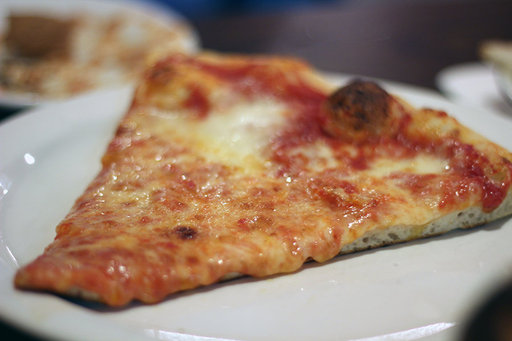

In [ ]:
import random
from PIL import Image
import glob

random.seed(5)

data_path = Path('/content/pizza_steak_sushi_apple_pie_beef_tartare')
data_path_list = list(data_path.glob('*/*/*.jpg'))

random_image_path = random.choice(data_path_list)
print(random_image_path)

image_class = random_image_path.parent.stem
print(image_class)

img = Image.open(random_image_path)
print('Image height:',img.height)
print('Image width:',img.width)
img

(341, 512, 3)


(-0.5, 511.5, 340.5, -0.5)

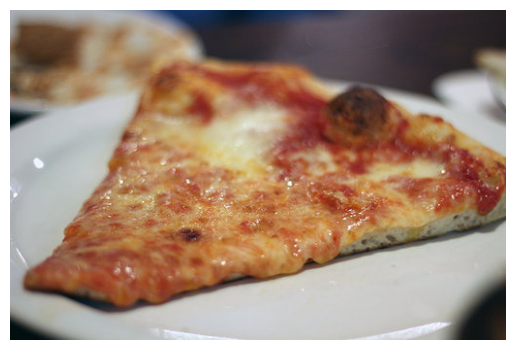

In [ ]:
import matplotlib.pyplot as plt
img = plt.imread(random_image_path)
print(img.shape)
plt.imshow(img)
plt.axis('off')

## 3. Transforming **data**

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


### 3.1 Transforming data with torchvision.transforms

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
#plot tranformed images

def plot_transformed_images(image_paths, transform, n=3, seed = 42):


  random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
 #print(random_image_paths)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis("off")

      # Transform and plot image
      # Note: permute() will change shape of image to suit matplotlib
      # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

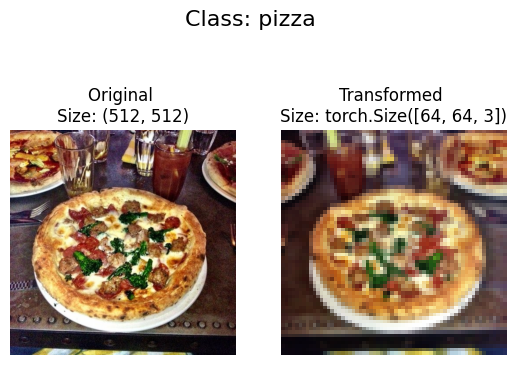

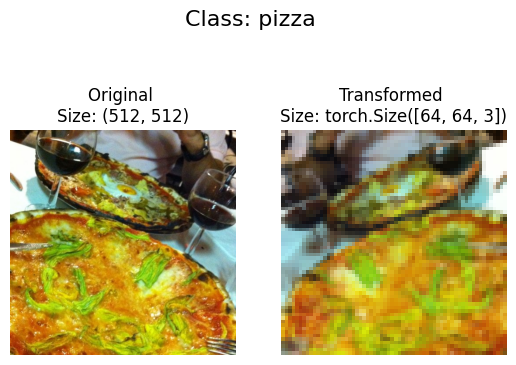

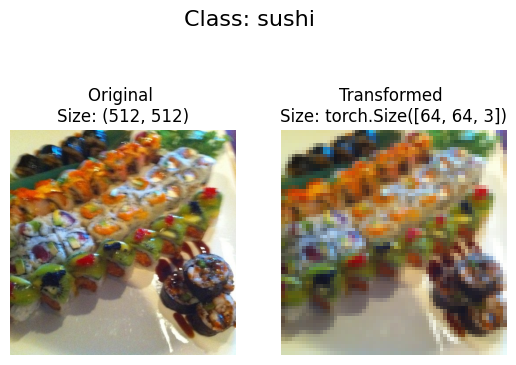

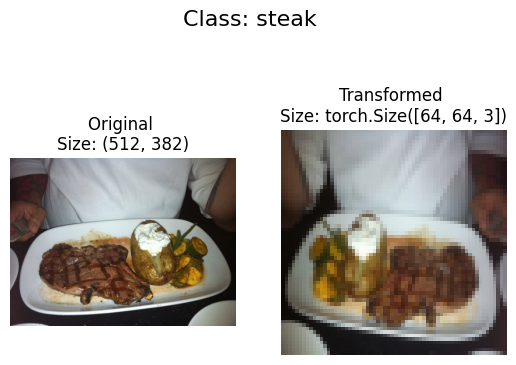

In [ ]:
plot_transformed_images(data_path_list,
                        transform=data_transform, n=4)

## 4. Option 1: Loading Image Data Using ImageFolder

In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 750
    Root location: /content/pizza_steak_sushi_apple_pie_beef_tartare/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 250
    Root location: /content/pizza_steak_sushi_apple_pie_beef_tartare/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [ ]:
# Get class names as a list
class_names = train_data.classes
class_names

['apple_pie', 'beef_tartare', 'pizza', 'steak', 'sushi']

In [ ]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'apple_pie': 0, 'beef_tartare': 1, 'pizza': 2, 'steak': 3, 'sushi': 4}

In [ ]:
# Check the lengths
len(train_data), len(test_data)

(750, 250)

In [ ]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.9529, 0.9333, 0.9451,  ..., 0.4157, 0.4000, 0.3843],
         [0.9961, 0.9961, 0.9922,  ..., 0.5333, 0.4784, 0.4471],
         [1.0000, 1.0000, 1.0000,  ..., 0.6627, 0.6784, 0.7137],
         ...,
         [0.2039, 0.2235, 0.2431,  ..., 0.1725, 0.1725, 0.1765],
         [0.2078, 0.2196, 0.2549,  ..., 0.1765, 0.1882, 0.1922],
         [0.1922, 0.2235, 0.2667,  ..., 0.1922, 0.2039, 0.2078]],

        [[0.9020, 0.8784, 0.8980,  ..., 0.1255, 0.1216, 0.1137],
         [0.9961, 0.9882, 0.9843,  ..., 0.2353, 0.2000, 0.1725],
         [1.0000, 1.0000, 1.0000,  ..., 0.3608, 0.4078, 0.4824],
         ...,
         [0.0471, 0.0510, 0.0667,  ..., 0.0275, 0.0275, 0.0275],
         [0.0431, 0.0588, 0.0745,  ..., 0.0314, 0.0314, 0.0353],
         [0.0471, 0.0627, 0.0824,  ..., 0.0353, 0.0353, 0.0353]],

        [[0.8314, 0.8039, 0.8353,  ..., 0.0627, 0.0627, 0.0627],
         [0.9882, 0.9765, 0.9765,  ..., 0.1294, 0.1059, 0.0980],
         [1.0000, 1.0000, 1.0000,  ..., 0.20

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


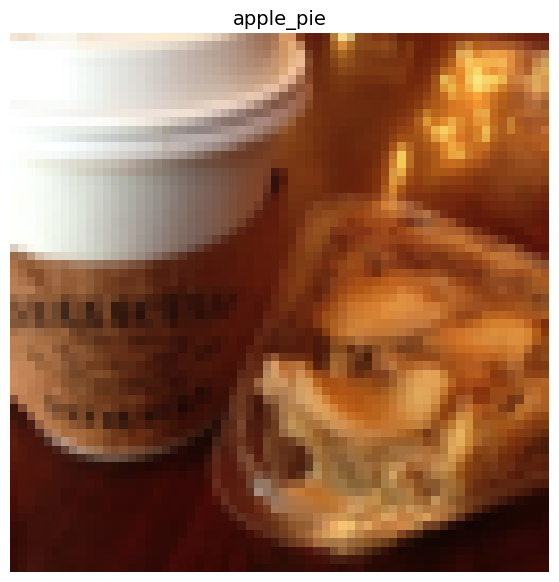

In [ ]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

### 4.1 Turn loaded images into DataLoader's

In [ ]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f0e16e8ee30>,
 <torch.utils.data.dataloader.DataLoader at 0x7f0e16e8fa30>)

In [ ]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [ ]:
class_names = train_data.classes
class_names

['apple_pie', 'beef_tartare', 'pizza', 'steak', 'sushi']

In [ ]:
# 1. Take in a Dataset as well as a list of class names
from typing import List, Tuple, Set
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

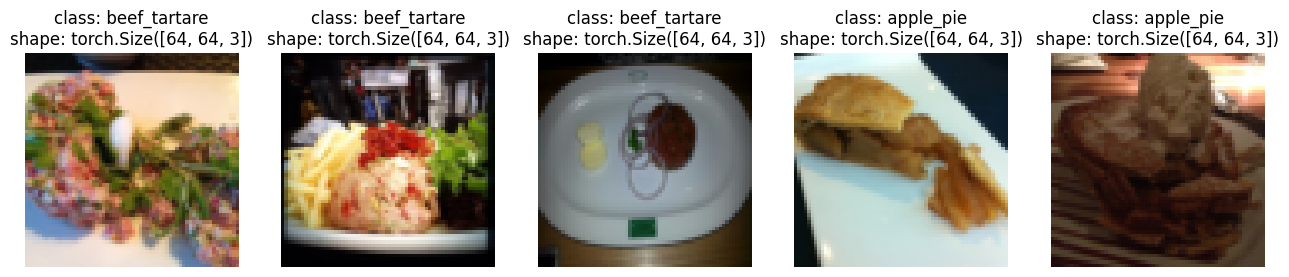

In [ ]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

## 6. Other forms of transforms (data augmentation)

In [ ]:
train_transform = transforms.Compose([transforms.Resize(size = (224, 224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()
                                      ])

test_transform = transforms.Compose([transforms.Resize((224,224)),
                                     transforms.ToTensor()])

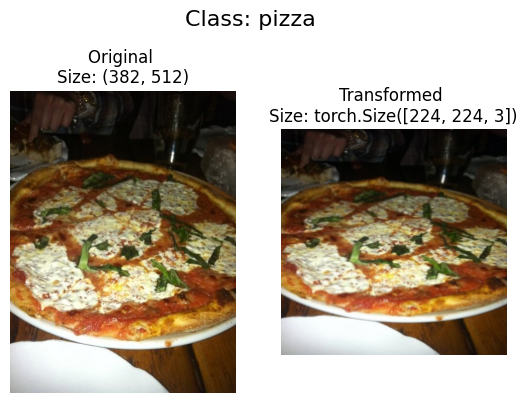

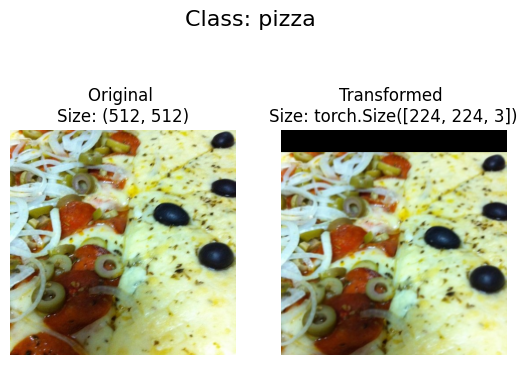

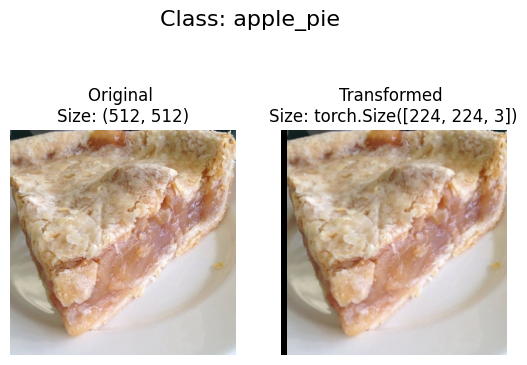

In [ ]:
plot_transformed_images(data_path_list, transform=train_transform, n=3 ,seed=1)

(512, 512)


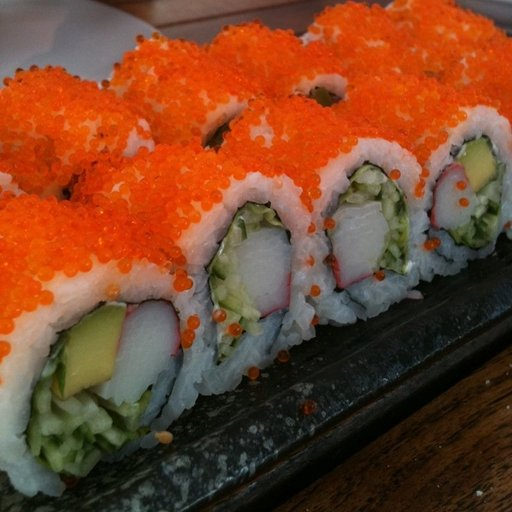

In [ ]:
# Imports PIL module
from PIL import Image

# open method used to open different extension image file
im = Image.open(data_path_list[0])
print(im.size)
# This method will show image in any image viewer
im


## 7. Model 0: TinyVGG without data augmentation

### 7.1 Creating transforms and loading data for Model 0

In [ ]:
from torchvision import transforms
simple_transform = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.ToTensor()
])

In [ ]:
from torchvision import datasets

train_data_sample = datasets.ImageFolder(train_dir,
                                         transform= simple_transform)

test_data_sample = datasets.ImageFolder(test_dir,
                                         transform= simple_transform)


In [ ]:
train_data_sample, test_data_sample

(Dataset ImageFolder
     Number of datapoints: 750
     Root location: /content/pizza_steak_sushi_apple_pie_beef_tartare/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 250
     Root location: /content/pizza_steak_sushi_apple_pie_beef_tartare/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [ ]:
len(train_data_sample), len(test_data_sample)

(750, 250)

In [ ]:
from torch.utils.data import DataLoader
import os

BATCH_SIZE = 32
NUM_OF_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(train_data_sample,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_OF_WORKERS, shuffle=True)

test_dataloader_simple = DataLoader(test_data_sample,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_OF_WORKERS, shuffle=True)

In [ ]:
len(train_dataloader_simple), len(test_dataloader_simple)

(24, 8)

### 7.2 Create TinyVGG model class

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
from torch import nn
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int):
    super().__init__()

    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2) # default stride value is same as kernel_size
    )

    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2) # default stride value is same as kernel_size
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block1(x)
    #print(x.shape)
    x = self.conv_block2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x
    # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0


TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=5, bias=True)
  )
)

In [ ]:
img_batch, label_batch = next(iter(train_dataloader_simple))

In [ ]:
img_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## Troubleshooting for Flattenn layer shape
model_0(img_batch)

torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
<ipython-input-94-b2a5230f667d> in <cell line: 1>()
----> 1 model_0(img_batch)

8 frames
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115
    116     def extra_repr(self) -> str:

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x1690 and 2560x5)

In [ ]:
model_0(img_batch.to(device))

tensor([[-2.6209e-04, -6.1534e-03,  3.7956e-02,  2.9347e-02,  2.9018e-02],
        [ 3.0221e-04, -3.7167e-03,  3.8947e-02,  2.7178e-02,  3.2672e-02],
        [ 2.1159e-03, -5.6783e-03,  3.3554e-02,  2.3499e-02,  2.7652e-02],
        [-3.4409e-03, -1.5805e-04,  3.3317e-02,  2.4167e-02,  2.7749e-02],
        [ 2.6515e-03, -6.6517e-03,  3.4386e-02,  2.4659e-02,  2.9656e-02],
        [ 1.5132e-03, -4.5123e-03,  3.5577e-02,  2.4480e-02,  3.1191e-02],
        [-1.5280e-03, -3.2842e-03,  3.6397e-02,  2.7333e-02,  2.8060e-02],
        [-1.4072e-03, -2.4341e-03,  3.6439e-02,  2.5674e-02,  2.7185e-02],
        [-7.1949e-04, -4.4678e-03,  3.2934e-02,  2.4644e-02,  2.9388e-02],
        [-8.0748e-04, -4.8440e-03,  3.6635e-02,  2.9254e-02,  3.0955e-02],
        [ 2.3692e-03, -4.0488e-03,  3.5102e-02,  2.9737e-02,  2.5704e-02],
        [-1.8178e-04, -4.9837e-03,  3.3187e-02,  2.1512e-02,  3.1588e-02],
        [ 6.0579e-05, -4.4515e-03,  3.6170e-02,  2.7243e-02,  2.9059e-02],
        [ 1.3560e-03, -5.

In [ ]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}, {class_names[torch.argmax(torch.softmax(pred, dim=1), dim=1)]}\n")
print(f"Actual label:\n{label_single}, {class_names[label_single]}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[ 0.0015, -0.0061,  0.0369,  0.0254,  0.0301]], device='cuda:0')

Output prediction probabilities:
tensor([[0.1968, 0.1953, 0.2039, 0.2016, 0.2025]], device='cuda:0')

Output prediction label:
tensor([2], device='cuda:0'), pizza

Actual label:
4, sushi


### 7.4 Use torchinfo to get an idea of the shapes going through our model

In [ ]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 5]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### 7.5 Create train & test loop functions

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

### 7.6 Creating a train() function to combine train_step() and test_step()

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

### 7.7 Train and Evaluate Model 0

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.6139 | train_acc: 0.2085 | test_loss: 1.6112 | test_acc: 0.2133
Epoch: 2 | train_loss: 1.6069 | train_acc: 0.1990 | test_loss: 1.6097 | test_acc: 0.2172
Epoch: 3 | train_loss: 1.5951 | train_acc: 0.2493 | test_loss: 1.5953 | test_acc: 0.2359
Epoch: 4 | train_loss: 1.5422 | train_acc: 0.3097 | test_loss: 1.5421 | test_acc: 0.2876
Epoch: 5 | train_loss: 1.4792 | train_acc: 0.3661 | test_loss: 1.5700 | test_acc: 0.2359
Total training time: 20.518 seconds


### 7.8 Plot the loss curves of Model 0

In [ ]:
# Check the model_0_results keys
model_0_results

{'train_loss': [1.6139381776253383,
  1.6068811068932216,
  1.595126802722613,
  1.5422427107890446,
  1.4791611184676488],
 'train_acc': [0.20851934523809523,
  0.1990327380952381,
  0.24925595238095236,
  0.30970982142857145,
  0.3660714285714286],
 'test_loss': [1.611197903752327,
  1.609732761979103,
  1.5952529311180115,
  1.5421481132507324,
  1.5699586123228073],
 'test_acc': [0.21334134615384615,
  0.21724759615384615,
  0.23587740384615385,
  0.28756009615384615,
  0.23587740384615385]}

In [ ]:
# Check the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
from typing import Dict
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(14, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

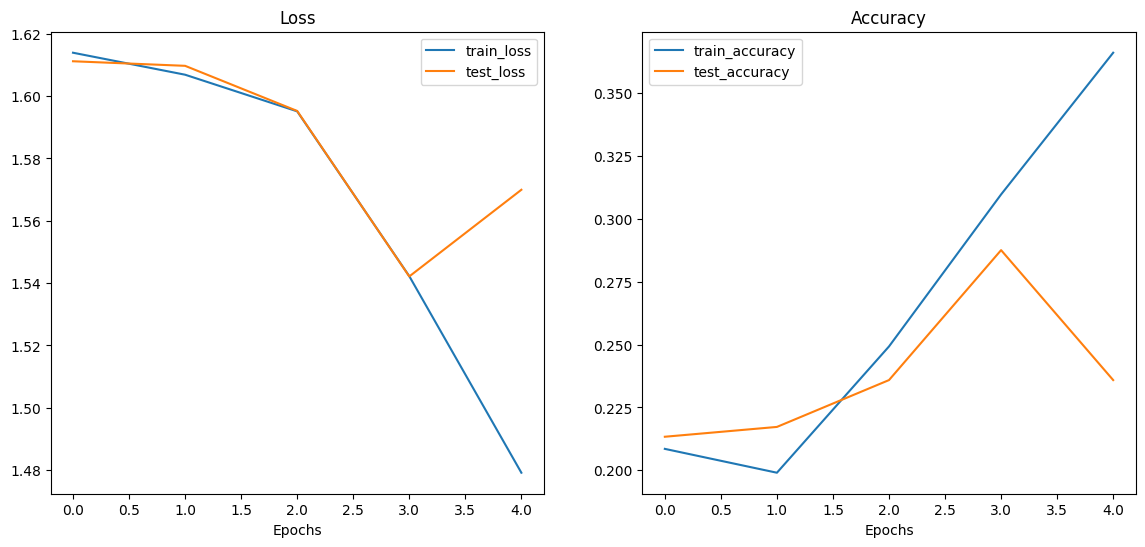

In [ ]:
plot_loss_curves(model_0_results)

## 8. What should an ideal loss curve look like?

## 9. Model 1: TinyVGG with Data Augmentation

In [ ]:
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.ToTensor()
])

In [ ]:
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial_augment)

test_data_simple = datasets.ImageFolder(root= test_dir,
                                        transform = test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 750
     Root location: /content/pizza_steak_sushi_apple_pie_beef_tartare/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 250
     Root location: /content/pizza_steak_sushi_apple_pie_beef_tartare/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [ ]:
import os

BATCH_SIZE = 32
NUM_OF_WORKERS = os.cpu_count()
torch.manual_seed(42)

train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size= BATCH_SIZE,
                                        shuffle=True,
                                        num_workers= NUM_OF_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=True,
                                    num_workers= NUM_OF_WORKERS)

train_dataloader_augmented, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7f0e170b1c60>,
 <torch.utils.data.dataloader.DataLoader at 0x7f0e148d40d0>)

In [ ]:
len(train_dataloader_augmented), len(test_dataloader_simple)

(24, 8)

torch.Size([3, 64, 64])
tensor(0)


Text(0.5, 1.0, 'apple_pie')

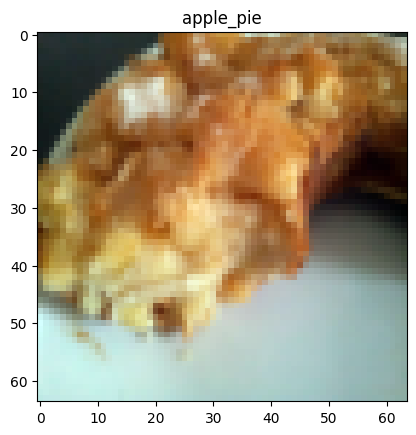

In [ ]:
img_aug, label_aug = next(iter(train_dataloader_augmented))
print(img_aug[0].shape), print(label_aug[0])
plt.imshow(img_aug[0].permute(1,2,0))
plt.title(class_names[label_aug[0]])

## 9.3 Construct and train Model 1

In [ ]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape= len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=5, bias=True)
  )
)

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.5158 | train_acc: 0.3339 | test_loss: 1.5294 | test_acc: 0.2930
Epoch: 2 | train_loss: 1.4919 | train_acc: 0.3222 | test_loss: 1.5299 | test_acc: 0.3215
Epoch: 3 | train_loss: 1.4831 | train_acc: 0.3584 | test_loss: 1.5070 | test_acc: 0.3179
Epoch: 4 | train_loss: 1.4662 | train_acc: 0.3752 | test_loss: 1.5130 | test_acc: 0.2963
Epoch: 5 | train_loss: 1.4633 | train_acc: 0.3823 | test_loss: 1.4924 | test_acc: 0.3462
Total training time: 19.396 seconds


### 9.4 Plot the loss curves of Model 1

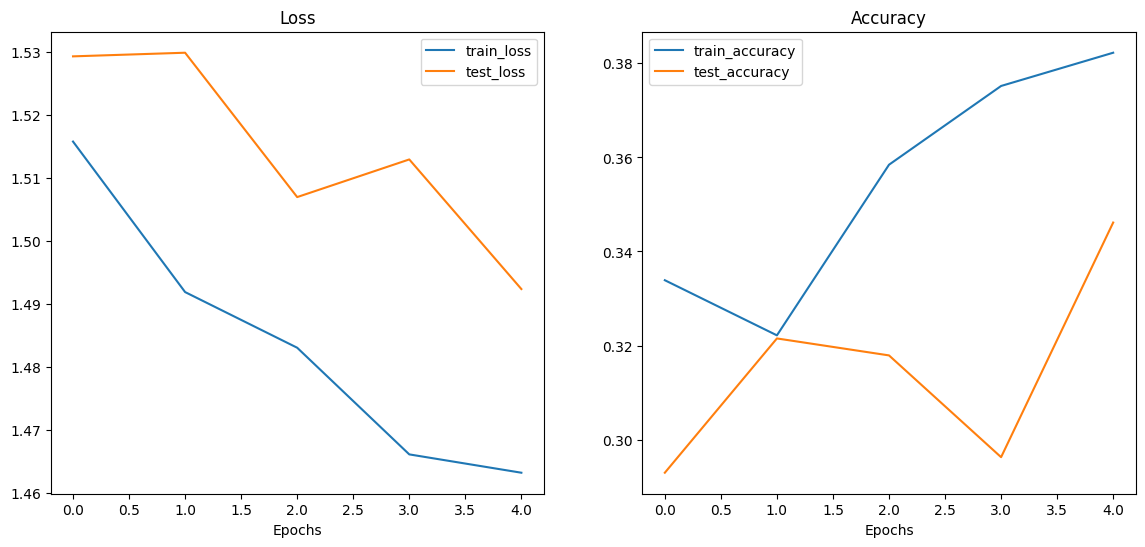

In [ ]:
plot_loss_curves(model_1_results)

## 10. Compare model results

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df, model_1_df

(   train_loss  train_acc  test_loss  test_acc
 0    1.613938   0.208519   1.611198  0.213341
 1    1.606881   0.199033   1.609733  0.217248
 2    1.595127   0.249256   1.595253  0.235877
 3    1.542243   0.309710   1.542148  0.287560
 4    1.479161   0.366071   1.569959  0.235877,
    train_loss  train_acc  test_loss  test_acc
 0    1.515828   0.333891   1.529355  0.292969
 1    1.491934   0.322173   1.529932  0.321514
 2    1.483097   0.358445   1.507014  0.317909
 3    1.466165   0.375186   1.512989  0.296274
 4    1.463255   0.382254   1.492416  0.346154)

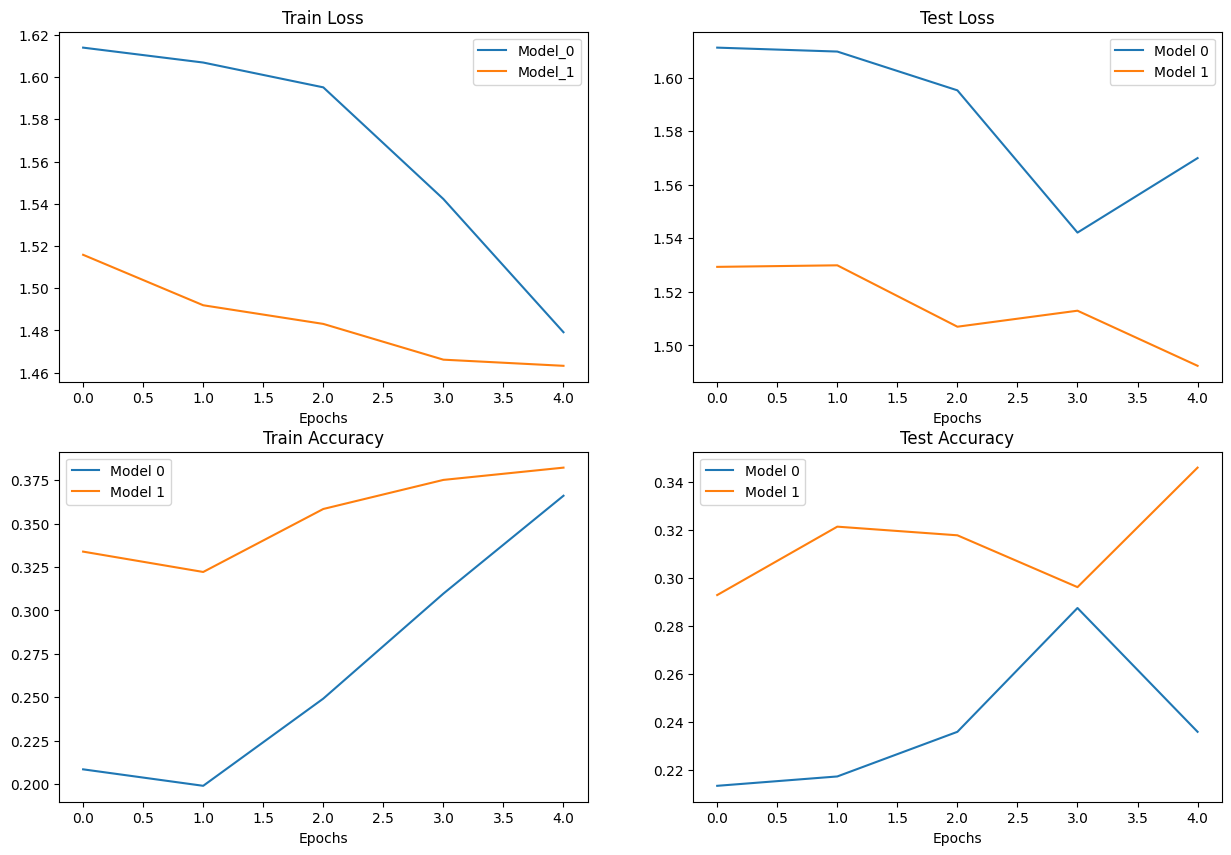

In [ ]:
plt.figure(figsize=(15,10))
# Get number of epochs
epochs = range(len(model_0_df))

plt.subplot(2,2,1)
plt.plot(epochs, model_0_df['train_loss'], label='Model_0')
plt.plot(epochs, model_1_df['train_loss'], label = 'Model_1')
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

## 11. Make a prediction on a custom image

In [ ]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

/content/pizza_steak_sushi_apple_pie_beef_tartare/04-pizza-dad.jpeg already exists, skipping download.


###  11.1 Loading in a custom image with PyTorch

In [ ]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 4032, 3024])

Custom image dty

In [ ]:
# Try to make a prediction on image in uint8 format (this will error)
model_1.eval()
with torch.inference_mode():
    model_1(custom_image_uint8.to(device))

RuntimeError: ignored

In [ ]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# # Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

### 11.2 Predicting on custom images with a trained PyTorch model

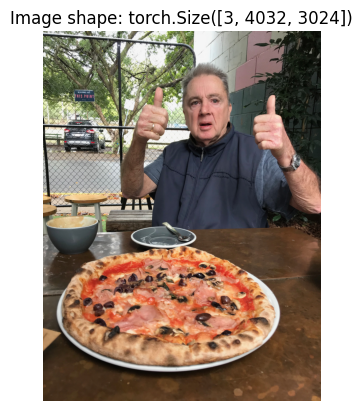

In [ ]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [ ]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.to(device))

RuntimeError: ignored

In [ ]:
model_1.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [ ]:
custom_image_pred

tensor([[-0.7033, -0.4078,  0.4614, -0.3521, -0.1825]], device='cuda:0')

In [ ]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[-0.7033, -0.4078,  0.4614, -0.3521, -0.1825]], device='cuda:0')
Prediction probabilities: tensor([[0.1156, 0.1553, 0.3704, 0.1642, 0.1945]], device='cuda:0')
Prediction label: tensor([2], device='cuda:0')


In [ ]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'pizza'

### 11.3 Putting custom image prediction together: building a function

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

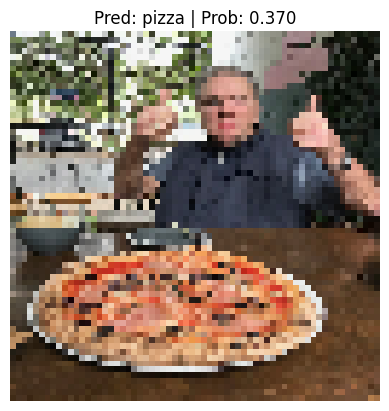

In [ ]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)